In [4]:
import matplotlib.pyplot as plt 
import numpy as np
import random 
from mpl_toolkits import mplot3d

In [77]:
# Constants - let t range from 0 to 1000 seconds
TIME_T = np.arange(0, 10, 0.00001)
K = 10

""" ================== START: Test Functions ================"""
def quadratic (t):
    return t**2

""" ================== END: Test Functions ================"""


""" ================== START: Function Definitions ================"""
def plotParametric (x_t, y_t):
    """ 
    Input: 2 functions of t, x(t) and y(t)
    Output: Plots x(t) against y(t). Does not return value.
    """
    plt.plot(x_t(TIME_T), y_t(TIME_T))
    
def plotValues (x_t):
    x_t(TIME_T)
    
def randSeqGen(low = 0, high = 1000):
    """
    Input: Lower limit and higher limit (int)
    Output: List of length K with random values between low and high
    """
    return [np.random.uniform(low, high) for i in range(K)]

def genTrigFun(a_k, b_k):
    """
    Input: Two sequences of length K
    Output: Trig function f(t) with coefficients corresponding to sequences a_k, b_k
    """
    def fun_t (t):
        sum = 0
        for i in range(len(a_k)):
            sum += a_k[i]*np.sin(i*t) + b_k[i]*np.cos(i*t)
        return sum
    return (fun_t)

def speed(x_t, y_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the speed 
    """
    return np.sqrt(np.gradient(x_t)**2 + np.gradient(y_t)**2)

def plotAgainstTime(f_t, x_t, y_t):
    plt.plot(TIME_T, f_t(x_t(TIME_T), y_t(TIME_T)))
    
def curvature(x_t, y_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the curvature
    """
    # TODO: USE DETERMINANT TO SCALE UP EASIER
    
    num = abs(np.gradient(x_t)*np.gradient(np.gradient(y_t))
             - np.gradient(y_t)*np.gradient(np.gradient(x_t)))
    denom = speed(x_t, y_t) ** 3
    return (num/denom)

""" ================== END: Function Definitions ================"""


' ================== END: Function Definitions ================'

In [95]:
a_k = np.cos(randSeqGen(-100,100))
b_k = randSeqGen(-100,100)
c_k = np.tan(randSeqGen(-100,100))
d_k = np.cos(randSeqGen(-100,100))

a_k_symmetric = randSeqGen(-100,100)
b_k_symmetric = np.sin(randSeqGen(-100,100))
c_k_symmetric = np.sin(randSeqGen(-100,100))
d_k_symmetric = randSeqGen(-100,100)

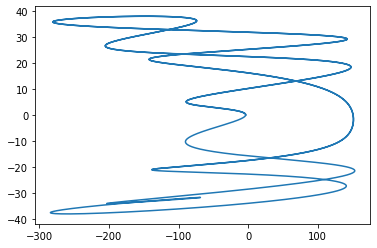

In [96]:
plotParametric(genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))

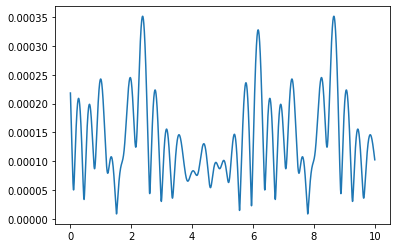

In [61]:
plotAgainstTime(speed, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))

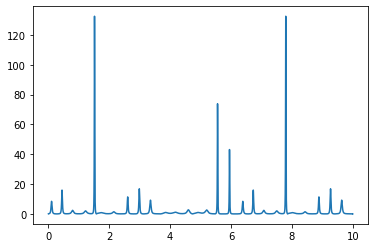

In [62]:
plotAgainstTime(curvature, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))

[0, 2, 0, 0.04]

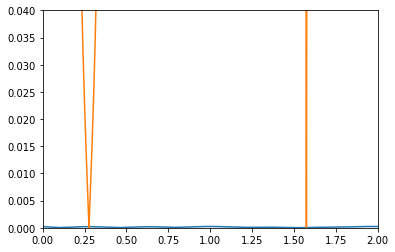

In [63]:
plotAgainstTime(speed, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))
plotAgainstTime(curvature, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))
plt.axis([0,2,  0, 0.04])

### 3D version

In [ ]:
def speed3d(x_t, y_t, z_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the speed 
    """
    return np.sqrt(np.gradient(x_t)**2 + np.gradient(y_t)**2 + np.gradient(z_t)**2)

def curvature3d(x_t, y_t, z_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the curvature
    """
    # TODO: USE DETERMINANT TO SCALE UP EASIER
    
    num = abs( (np.gradient(y_t)*np.gradient(np.gradient(z_t)) - np.gradient(z_t)*np.gradient(np.gradient(y_t)))
              - (np.gradient(x_t)*np.gradient(np.gradient(z_t)) - np.gradient(z_t)*np.gradient(np.gradient(x_t)))
              + (np.gradient(x_t)*np.gradient(np.gradient(y_t)) - np.gradient(y_t)*np.gradient(np.gradient(x_t))) )
    denom = speed3d(x_t, y_t, z_t) ** 3
    return (num/denom)

def plotAgainstTime3d(f_t, x_t, y_t, z_t):
    plt.plot(TIME_T, f_t(x_t(TIME_T), y_t(TIME_T), z_t(TIME_T)))

In [109]:
a_k = randSeqGen(-100,100)
b_k = randSeqGen(-100,100)
c_k = randSeqGen(-100,100)
d_k = randSeqGen(-100,100)
e_k = randSeqGen(-100,100)
f_k = randSeqGen(-100,100)

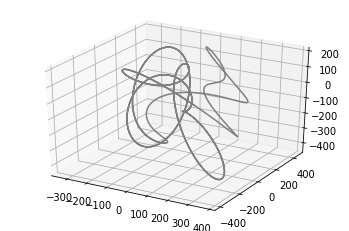

In [110]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = genTrigFun(e_k, f_k)(TIME_T)
xline = genTrigFun(a_k, b_k)(TIME_T)
yline = genTrigFun(c_k, d_k)(TIME_T)
ax.plot3D(xline, yline, zline, 'gray')


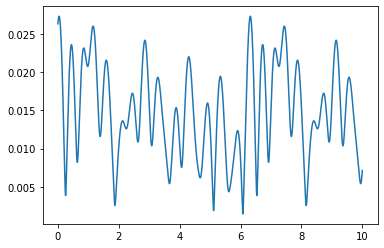

In [111]:
plotAgainstTime3d(speed3d, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k), genTrigFun(e_k, f_k))

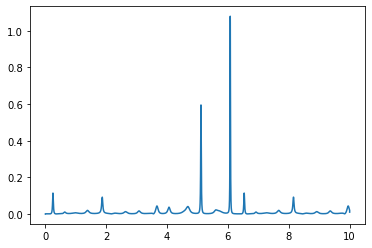

In [112]:
plotAgainstTime3d(curvature3d, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k), genTrigFun(e_k, f_k))

[0, 2, 0, 0.04]

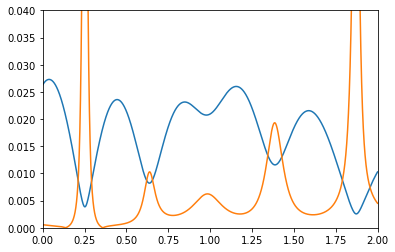

In [113]:
plotAgainstTime3d(speed3d, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k), genTrigFun(e_k, f_k))
plotAgainstTime3d(curvature3d, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k), genTrigFun(e_k, f_k))
plt.axis([0,2,  0, 0.04])